# Lab 4: Image Enhancement Using Filters

## 1. Smoothing (Denoising) Filters

### 1.1. Box Filter (Mean Filter)
Averaging filter replaces each pixel value with the average of its neighbors. It blurs the image and removes small details or noise.

**When to use:**
- You need a fast, basic smoothing

- Removing random noise (not salt & pepper)


In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)
noise= cv2.imread('noise.png', cv2.IMREAD_GRAYSCALE)

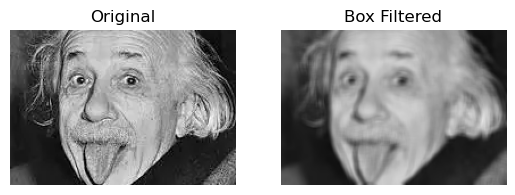

In [21]:
blur_box = cv2.blur(img, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blur_box, cv2.COLOR_BGR2RGB))
plt.title("Box Filtered")
plt.axis('off')
plt.show()


### 1.2. Gaussian Blur
Weights the neighboring pixels using a Gaussian function (more weight to nearby pixels). Produces natural, soft blur.

**When to Use:**
- Removing Gaussian noise

- Preprocessing before edge detection



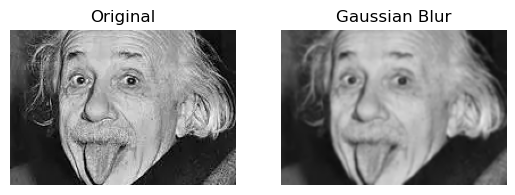

In [22]:
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')
plt.show()

### 1.3. Non-Linear Smoothing: Median Filter
Replaces a pixel with the median of its neighborhood. Best for salt and pepper noise.

**When to Use:**
- Salt & pepper noise is present

- You want to preserve edges while removing noise

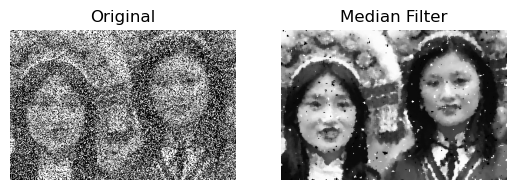

In [23]:
median_blur = cv2.medianBlur(noise, 5)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Filter")
plt.axis('off')
plt.show()

## 2. Image Sharpening

### 2.1. Unsharp Masking
Subtract a blurred version from the original image to enhance high-frequency details.

**When to USe:**
- Enhancing overall image clarity

- Medical/scientific images

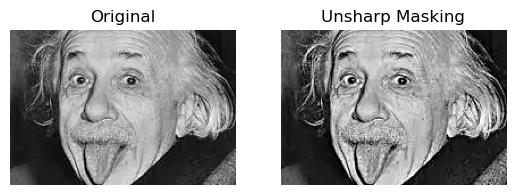

In [24]:
blurred = cv2.GaussianBlur(img, (9, 9), 10)
unsharp = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(unsharp, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Masking")
plt.axis('off')
plt.show()


### 2.2. High Boost Filtering
A generalized form of unsharp masking:
$$HighBoost= A * Original - Blured (A>1) $$
**When to Use:**
- You want stronger sharpening

- Enhancing fine texture

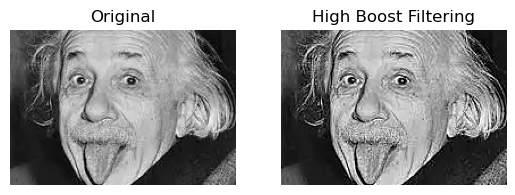

In [25]:
A = 1.8
blurred_high = cv2.GaussianBlur(img, (5, 5), 0)
high_boost = cv2.addWeighted(img, A, blurred_high, -(A - 1), 0)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(high_boost, cv2.COLOR_BGR2RGB))
plt.title("High Boost Filtering")
plt.axis('off')
plt.show()


### 2.3. Sobel Filter
Detects edges by finding gradients in horizontal or vertical directions.

**When to Use:**
- Detecting object boundaries

- Edge-based segmentation

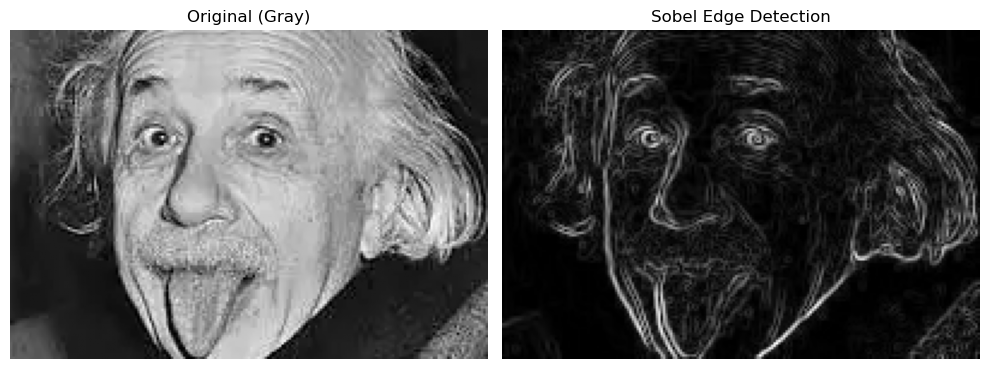

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)


sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = np.uint8(cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX))


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original (Gray)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

### 2.4. Laplacian Filter
Second-order derivative used to detect edges in all directions.

**When to Use:**
- You want to detect all edge orientations

- Highlighting fine details

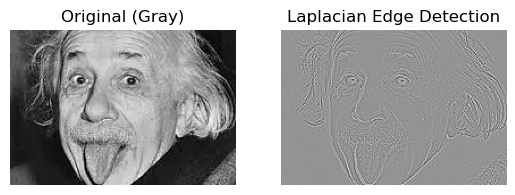

In [27]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original (Gray)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()
